In [1]:
from decimal import Decimal
from papermodels.paper.pdf import load_pdf_annotations
from papermodels.datatypes.geometry_graph import GeometryGraph
from papermodels.datatypes.joist_models import JoistArrayModel

## 1. Create the graph

The graph is now the primary entry point. Unfortunately, I have not implemented plotting annotations from the graph yet. That will be coming soon.

TODO:

1. Parse trib areas from the PDF markup and include them in the frame loading
2. Plotting annotations from the graph
3. Implementing the ability to mark an origin on the PDF mark (for pages that do not line up)

In [2]:
graph = GeometryGraph.from_pdf_file("sketch_to_scale.pdf", scale=Decimal(1 / 72 * 4))
graph.generate_subelements(JoistArrayModel.create_subelements, spacing=1.3333)
les = graph.create_loaded_elements()

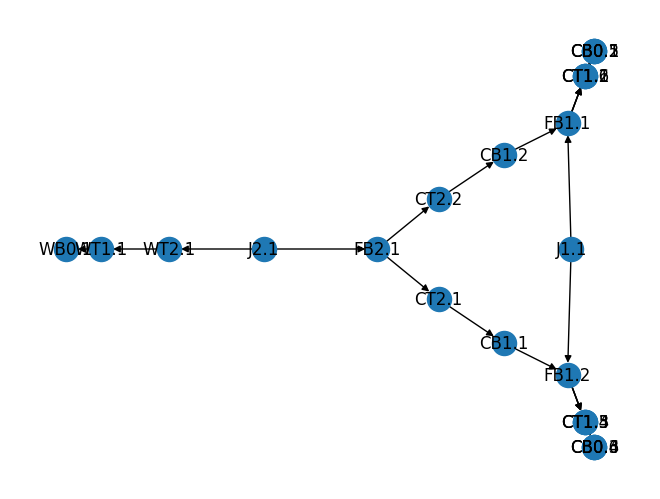

In [3]:
graph.plot()

## 2. Output the model files

Currently outputs in either JSON or TOML. Both are equivalent to a dictionary and can be parsed by modules in the standard library, i.e. `toml`, `json`.

In [4]:
import pathlib
output_dir = pathlib.Path("model_files")

file_format = "toml" # also try "json"

for loaded_element in les:
    if file_format == "toml":
        output_toml = output_dir / "toml"
        output_toml.mkdir(parents=True, exist_ok=True)
        with open(output_dir / "toml" / f"{loaded_element.tag}.toml", "wb") as file:
            loaded_element.dump_toml(file)
    elif file_format == "json":
        output_json = output_dir / "json"
        output_json.mkdir(parents=True, exist_ok=True)
        with open(output_dir / "json" / f"{loaded_element.tag}.json", "w") as file:
            loaded_element.dump_json(file)
        